In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline
#get data
path = 'dataset\\dataset\\'
fileNames = ['2011Tornado_Summary','2012Sandy_Summary','2013Floods_Summary','2016Blizzard_Summary','2016Matthew_Summary','2017Hurricane_Summary','2018Michael_Summary','2018Wildfires_Summary']
#contains all filenames in a list, so dont not have to rewrite names
fullPath = path+fileNames[0]+'.csv'
tweets = pd.read_csv(fullPath)



In [114]:
def stringLen(x):
    return len(x)
tweets['wordlen'] = tornado2011['text'].apply(lambda x : stringLen(x))
tweets['wordlen'].describe() #mean len of words is 114

count    3572.000000
mean      114.844625
std        25.918095
min        24.000000
25%        98.000000
50%       122.000000
75%       136.000000
max       240.000000
Name: wordlen, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

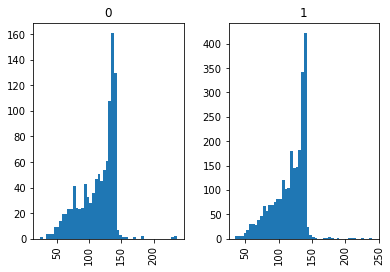

In [115]:
tweets.hist(column = 'wordlen', by = 'label', bins = 50) #word lenght does not matter when checking the comparisons

In [116]:
#remove punkjuation

from nltk.corpus import stopwords


def textProcess(x):
    """
    takes text string, and processes it into only useful words without punchuation or stuff it those kinda 
    words that dont mean anything
    """
    message = x
    removePunchuation = [char for char in message if char not in string.punctuation] #considerations for when or when to not incloude ! as something useful
    removePunchuation = ''.join(removePunchuation)
    removeWrdEnd = [word for word in removePunchuation.split() if word.lower() not in stopwords.words('english')]
    return removeWrdEnd
tweets['text'].head(5).apply(textProcess)

0    [RT, uberdogfound, Please, RT, Food, needed, s...
1    [Please, RT, Food, needed, shelter, NC, area, ...
2    [‚ô°its, raining, tornado, warningsabout, coma...
3    [Lmao, damn, RT, LuCeCaNNoNn, dont, get, food,...
4    [Saved, tornado, warningIm, ready, eat, good, ...
Name: text, dtype: object

In [87]:
#it used the bad of words model

In [93]:
bow_transformer = CountVectorizer(analyzer=textProcess).fit(tornado2011['text'])
print(len(bow_transformer.vocabulary_))

9934


In [117]:
#use bow to transform messages from dataframe 

  (0, 2107)	1
  (0, 2151)	1
  (0, 2817)	1
  (0, 3170)	1
  (0, 4350)	1
  (0, 4967)	1
  (0, 5149)	1
  (0, 5563)	2
  (0, 5707)	1
  (0, 5999)	1
  (0, 7391)	1
  (0, 9119)	1
  (0, 9777)	2
(1, 9934)


In [122]:
tweets_bow = bow_transformer.transform(tweets['text'])
#transform it into a sparse matrix
print('sparse matrix shape',tweets_bow.shape)
print('amount of zer-occurences',tweets_bow.shape)

sparse matrix shape (3572, 9934)
amount of zer-occurences (3572, 9934)


In [124]:
#some sparisty stuff heere

In [129]:
#using tfidf to do frequency
tf_transformer = TfidfTransformer().fit(tweets_bow)
tf4 = tf_transformer.transform(bow4)
print(tf4)

  (0, 9777)	0.5095329139106146
  (0, 9119)	0.05691899064932606
  (0, 7391)	0.3437503843757557
  (0, 5999)	0.19919026900798922
  (0, 5707)	0.15357327932555756
  (0, 5563)	0.2606133600547072
  (0, 5149)	0.1964342173523837
  (0, 4967)	0.23021896877036022
  (0, 4350)	0.25953647327694973
  (0, 3170)	0.3437503843757557
  (0, 2817)	0.11188862273994998
  (0, 2151)	0.3437503843757557
  (0, 2107)	0.28283776065490934


In [135]:
#can now check frequency of words
word = 'stupid'
print(tf_transformer.idf_[bow_transformer.vocabulary_[word]])


7.101719316343574


In [137]:
tweets_tf = tf_transformer.transform(tweets_bow)
print(tweets_tf.shape)

(3572, 9934)


In [ ]:
#use this for the classifications or something. 